# <font color="purple">Linear Regression</font>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

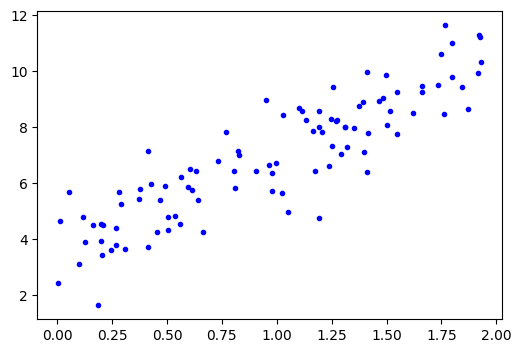

In [4]:
plt.figure(figsize=(6,4))
plt.plot(X, y, 'b.')

## Normalization

In [5]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[3.55151236],
       [3.4651426 ]])

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.55151236],
       [10.48179757]])

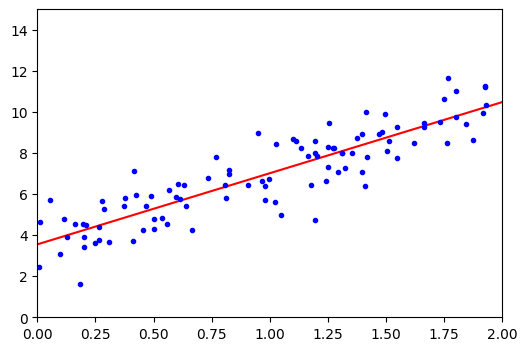

In [16]:
plt.figure(figsize=(6,4))
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Performing Linear Regression using Scikit-Learn

In [9]:
 from sklearn.linear_model import LinearRegression
    
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [10]:
lin_reg.intercept_, lin_reg.coef_

(array([3.55151236]), array([[3.4651426]]))

In [11]:
lin_reg.predict(X_new)

array([[ 3.55151236],
       [10.48179757]])

The LinearRegression class is based on the scipy.linalg.lstsq() function (the
name stands for “least squares”), which you could call directly:

In [12]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.55151236],
       [3.4651426 ]])

## Batch Gradient Descent

In [13]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients


In [14]:
theta

array([[3.55151236],
       [3.4651426 ]])

## Stochastic Gradient Descent

In [19]:
n_epoch = 50
t0, t1 = 5, 50
m = 100

def learning_rate(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epoch):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        etr = learning_rate(epoch * m + i)
        theta = theta - etr * gradients

In [20]:
theta

array([[3.54684788],
       [3.46636483]])

In [21]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [22]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.53083367]), array([3.46292285]))

## Polynomial Regression

In [23]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

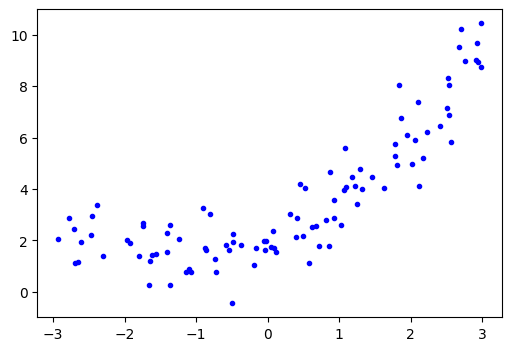

In [25]:
plt.figure(figsize=(6,4))
plt.plot(X, y, 'b.')

In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [27]:
X[0]

array([0.87714586])

In [28]:
X_poly[0]

array([0.87714586, 0.76938487])

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [31]:
lin_reg.intercept_, lin_reg.coef_

(array([2.00429391]), array([[1.08670645, 0.46020605]]))

In [44]:
y_predict = lin_reg.predict(X_poly)
y_predict[:4]

array([[3.31156955],
       [3.71821399],
       [2.76313661],
       [1.36562601]])

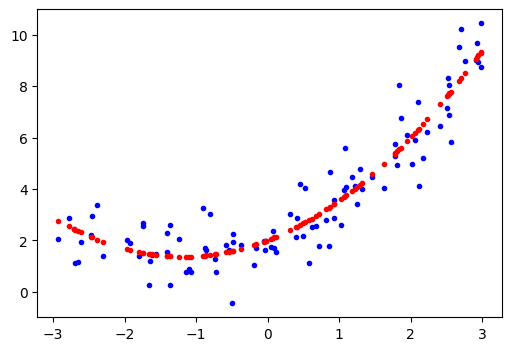

In [49]:
plt.figure(figsize=(6,4))
plt.plot(X, y, 'b.')
plt.plot(X, y_predict, 'r.')

## Learning Curve

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [53]:
def plot_learning_curve(model, X, y):
    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_error, val_error = [], []
    
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_error.append(mean_squared_error(y_train[:m], y_train_predict))
        val_error.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_error), 'r-+', linewidth=2, label = "train")
    plt.plot(np.sqrt(val_error), 'b-', linewidth=3, label = "val")

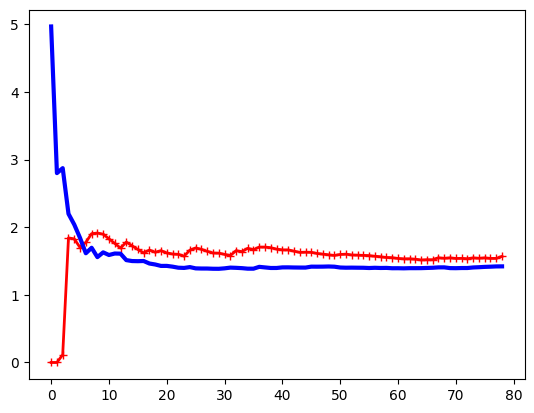

In [54]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)

In [55]:
from sklearn.pipeline import Pipeline

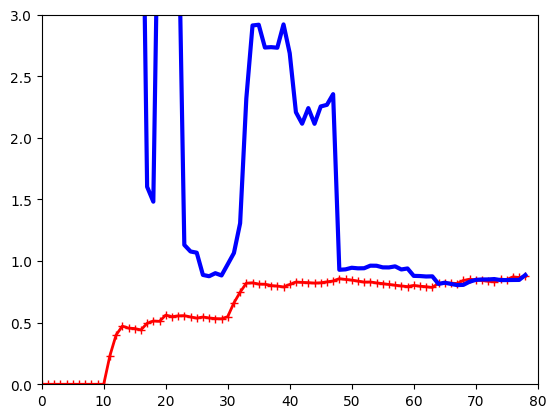

In [56]:
poly_reg = Pipeline([
    ("polynomial_features",PolynomialFeatures(degree=10, include_bias=False)),
    ("linear_model", LinearRegression())
])
plt.xlim(0, 80)
plt.ylim(0, 3.0)
plot_learning_curve(poly_reg, X, y)

## Regularization

### Ridge Regression 

In [57]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.12853159]])

In [58]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.11589546])

### Lasso Regression

In [59]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.08961608])

### Elastic Net Regression

In [61]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.08547552])

### Early Stopping

In [62]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [64]:
poly_scaler = Pipeline([
    ("poly_reg", PolynomialFeatures(degree=90,include_bias=False)),
    ("standard_scaler", StandardScaler())
])

X_train_poly_scale = poly_scaler.fit_transform(x_train)
X_val_poly_scale = poly_scaler.transform(x_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

In [65]:
min_value_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scale, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scale)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < min_value_error:
        min_value_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

# <font color="purple">Logistic Regression</font>

In [66]:
from sklearn import datasets

In [70]:
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [71]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris virginica, else 0

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

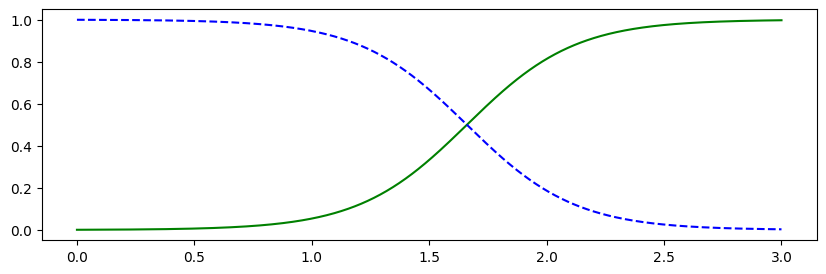

In [77]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10,3))
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

In [78]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

## Softmax Function

In [79]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

In [80]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [81]:
softmax_reg.predict([[5, 2]])

array([2])

In [82]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])